# Predicting Prices of Used Cars on Craigslist


### Context
Buyer’s Choice (BC) is a small used car company based in CT lead by CEO Dapper Dan. BC's usual process for deciding to buy vehicles from its warehouse is to determine what the likely price would be if the vehicle was sold in the store (BC Price). 

If the BC predicted price is more than $2k than the warehouse asking price, then BC buys the vehicle. They expect to run a profit at least 80 percent of the time.

However with the advent of Covid, people just are not coming into the store. BC has therefore switched to selling their cars online. These prices often differ from the prices they would normally get at the store. BC has therefore created an algorithm to predict the value of a vehicle.  

The company has recently been given the option to buy 25 vehicles. BC wants to know which of these 30 vehicles they should purchase. 

## 1. Problem statement 
Should used car dealership Buyer’s Choice buy any of the gently used vehicles being offered? To answer this question we need to predict the value of each used car. If the predicted price is more than $2k than the asking price, BC should buy the vehicle.  

## 2. Data

#### Main Database
**[Austin Reese's Craiglist Data ](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)**
To determine the price of gently used vehicles online, we looked at the price of used vehicles on Craigslist. The dataset we used was created by Austin Reese January 2020 by scraping data from  "every used vehicle entry within the United States" on Craigslist on Feb 2020. Besides the price being asked for each used vehicle, this data also includes other things listed on the used vehicle entry like mileage, the model and condition of the vehicle.


#### Four other supplementary databases:

1) [Back4app](https://www.back4app.com/database/back4app/car-make-model-dataset)- For vehicle model data we used data from from back4app an open data source that uses categories vehicle models based on US department of transportation. These categories are grouping such as "convertible" or "pickup".

2) [Cooper Union's Kagle Dataset](https://www.kaggle.com/CooperUnion/cardataset) - We also tried to find vehicle MSRP (aka price the market price listed by companies when the vehicle was new). We used data scraped from Edmunds (One of the most well known reviews of automobiles and their prices in the USA). This data was scraped, compiled and put on kaggle by CopperUnion in 2016.

3) [AAA](https://web.archive.org/web/20200226222808/https://gasprices.aaa.com/state-gas-price-averages/) - State Gas prices  come from AAA which shows the daily average gas prices for a state. They do not store this data so the data was scraped from the next nearest date available from the web archive.


4) [DQYDJ](https://dqydj.com/average-income-by-state-median-top-percentiles/) This data for household income by state was from DQYDJ a place that holds financial data and that is recommend by the WSJ and the NYT.

## 3. Data Cleaning- Data Cleaning rules
 [Cleaning Data Notebook](./auto_clean_p1_cleandata.ipynb).

**RELEVANCE**: We want to use data that will help us predict the price of a good condition vehicle. Therefore, outliers to the dataset, such as million dollar superluxury cars, or "junkers" (vehicle that are being sold for scraps) are not useful to the dataset. We can therefore remove these outliers. 
* This study is not looking at Super luxury cars/ antique cars: 
    * None of the vehicles should have a price greater than half a million
    * If MSRP is listed none of the vehicles should have an MSRP greater than a million
* This study is not looking at junker cars so we do not need vehicles:
    * Priced at 1000 dollars or less
    * That have over a half million miles on them
    * In poor condition or have a title status equal or worse than salvage
    * Are over than 10 years old (we are also not looking at antique cars)
* This study is not looking at motorbikes or busses 
    * We don't need Harley Davidson’s or Hennessey’s 

**INCOMPLETE**: Since we are trying to predict the price of vehicles when we know the vehicle's Make, Model, Model Year, Mileage and condition we eliminate from the data set vehicles where price, make, model, model year, mileage and condition are not listed.

**ACCURACY**: All other entries were reviewed to ensure they were complete and usable 
* Cleaning obvious errors:
    * We are looking at used vehicles so the vehicles age should be greater than 1 year
    * String Cleaninging aka "BMW" or "bmw" or "BMW   " are all manufactured by BMW


## 4. Data Manipulation- Merging Data
 [Merging Data Notebook](./auto_clean_p2_mergedata.ipynb).

### Using the MMY from each vehicle we map what category the vehicle belongs to

#### Defining MMY
* Automobiles models are referenced by its a) manufacture b) model name, and C) model year (otherwise known as the MMY)
* Each mmy has an average MSRP to go with it and a specific groups of catehories can be in 
    * (ex a camry can be sedan or hatchback it can't be a pickup)
* We will therefore use the MMYas a key to map the MSRP and category to the main data set

####  Issue: Model names of automobile
* The trim of a model is referencing a set of additional features comes with (example Camry Lux has leather seats)
* The trim changes the price of a vehicle
* Therefore sometimes sellers will add the trim after the model design to give a better idea of what they are selling
* This leads to the model name not being consistent across tables.

####  Fixing the Issue
* To ensure better mapping we will therefore use 2 keys 
* The first key will match the full name of the model for the mmy
* The second key will match the first word name of the model for the mmy
* We will try to map to first the key if a map isn't reached we use the results from the second key.
* both keys include the manufacturer and model year



## 5. Data Imputation
[Data Imputation Notebook](./auto_clean_p3_impute_data).

When looking at the vehicles we note that there are lot of nulls about the vehicles features (example: the number of cylinders, drive, transmission, size, and type of vehicle). When buying a vehicle these are things you would usually ask the seller because it does effect the price of the vehicle (a vehicle with more cylinders usually is of higher value than one is of less). 

While these features can differ within a make (aka brand here listed as manufacturer) model, and model year (MMY) of a vehicle we can narrow down what the feature should be given the other features of the vehicle. For example: a  2016 Jaguar F-Type  can be all wheel drive or all-wheel drive ,  be a coupe or convertible, be automatic or manual transmission. You would think there be at least 8 configurations of the F-type.   However only a certain grouping of configurations (called Trims) that these vehicle are sold as.  There are actually on 6 configurations for the 2016 Jaguar F-Type because you can only get a manual transmission with rear wheel drive. 

If we don't have enough data to impute the vehicle given MMY and the other features we can determine the feature given its MMY. This is because A) There is usually a most popular trim for the MMY of a vehicle. B) Some features do not differ within MMY for example the 2017 Honda Accord only has 4 cylinders. 

If MMY does not give us a value we can look at just the make and model. The most likely configuration for model does change for each model year. However the trims of these features only change for every redesign of the model which does not happen every model year. So after looking a MMY we look at make model.





## 6. EDA

### 6a EDA- Removing Outliers
[EDA Notebook](./auto_clean_p4_EDA).

We do not want any outliers in our dataset before we make any calculations. However we already eliminated a lot of the outliers due to the common sense cleaning rules (this is particularly true for age, price, and mileage). Further price, and mileage have a non-normal distribution. They both have long tails as values get higher (there are fewer and fewer very expensive vehicles or vehicles with high mileage). They both have a cut at low values as neither mileage nor price is a negative value. Due to all these deletions we have to be conservative in stating a vehicle is an outlier for mileage, price or any variable that was calculated from price or mileage (aka Avg Mileage or MSRP).

Therefore we are conservative in our deletion for these vehicles:
* The 98the percentile and the 99th percentile differ by larger than 1 standard deviation. Then all values greater than the 98th percentile are likely to be outliers.
* Similarly elimiate if 99th percentile and maximum differ by larger than 1 standard deviation. Then all values greater than the 99th percentile are likely to be outliers.

The results of this investigation is that odometer (mileage), average mileage, price, and cylinders needed to be investigated. Below is the new distribution of the vehicles. 



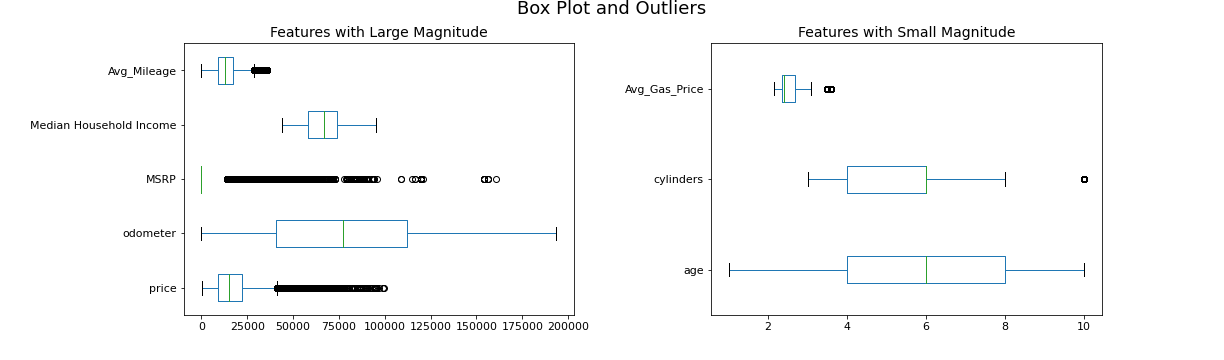

In [196]:
from IPython import display 
display.Image("figures/Boxplot.png")

### 6b. Feature Manipulation: Average Mileage, Lux, Smake
By looking at varius relationships in the data we noted that some charachteristics effected price. From this we created new variables

* "Average mileage": A 10 year old vehicle with 10000 miles on it is considered to have been much more gently used than a 1 year vehicle with 10000 miles on it.
* "Lux": A few brands are defined as luxury vehicles (Example BMW, Audi, Land Rovers) we put vehicles of these brands into a seperate category.
* "Smake": Vehicles that have many high vehicle charachtaristics that combined would be highly valuable to a buyer. (example a "smake" 8 cylinder vehicle with 4wd would be included). If the vehicle had a combination of more than one smake the number increased (Example: If the above vehicle was also a diesel vehicle under 5 years of age)


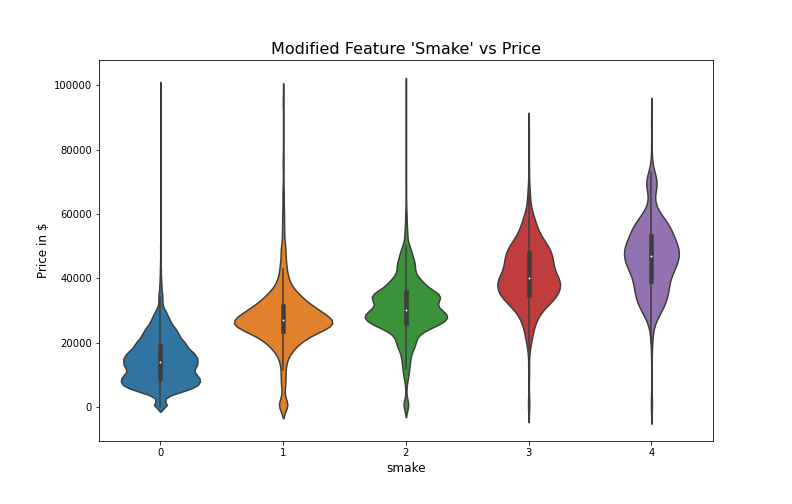

In [197]:
from IPython import display 
display.Image("figures/Figx_Price_smake.png")

## 7. Feature Selection
[Feature Selection Notebook](./auto_clean_p5_Feature_Selection).


Before we were want to determine only necessary vehicles for our study. Now we onyl want to contain necessary variables. The below description explains why we chose to drop certain variables to improve our model. 

### 7a: Dropping Categorical Variables
* We want to reduce the number of unnecessary variables. Below are some of the reasons:
* We eliminate categorical variables that are included in another variable (aka inter correlation)
    * E.g., Division, State, and region. As each state has only one division. Each region can only fit in one states
    * We eliminated type and Category as they both fit within Category_cleaned
* We Eliminate categorical variables that are either unique to each vehicle or have too many categories within it because that would create too many dummy variables 
    * There are over 10000 models and while models are not completely unique to each vehicle considering we are trying to determine the asking price when we don't know the value of the model it goes around the point of the study. However again it could be something to look into.
    * There are over 400 regions while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study
    * There are over 50 states while this could be an interesting study we don't need it as we have division, longitude and latitude. It might be something to look into for another study.
* We eliminate variables that have only one value as the don't add anything to the model
    * title status
    
### 7b: Dropping Continous Variables
We check correlation between our features. We do not want highly correlated variables (aka correlation whose absolute value is of over 0.8 in our data). In our investigation we only find year which is highly correlated to age. We therefore eliminated year from our variables.

### 7c . Feature Selection: Handling the nominal variables (aka cylinders)
* Cylinders is an nominal variable. That means it is ordinal (1 cylinder < 2 cylinders) but it is non-continous (no such thing as half a cylinder). This is hard to model. We can either treat it as a categorical varible or we can treat is numerical variable.
    * Treating cylinders as a categorical variable: Pro: No wrong assumptions Con: Loss of ordering
    * Treating cylinders as a numerical variable: Pro:keep ordering information. It allows us to analyze the data using techniques that is familiar and easily understandable. Con: Incorrectly assumes continuosness
* We prefered to lose information than to assume incorrectly so we changed cylinders to a categorical variable



## 8. Pre Processing the Data
[Data PreProcessing Notebook](./auto_clean_p6_PreProcessing).

Befeore we can use the data to generate a model we need to make the data able to be understood by the model. In this case, we scale the data using a minmax scaler and turn all our categorical variables into dummy variables. We then seperate the data into our training data and test data. We also remove select dummy variables due to strong intercorrelation.  For example looking at the below table we eliminate fuel_gas.

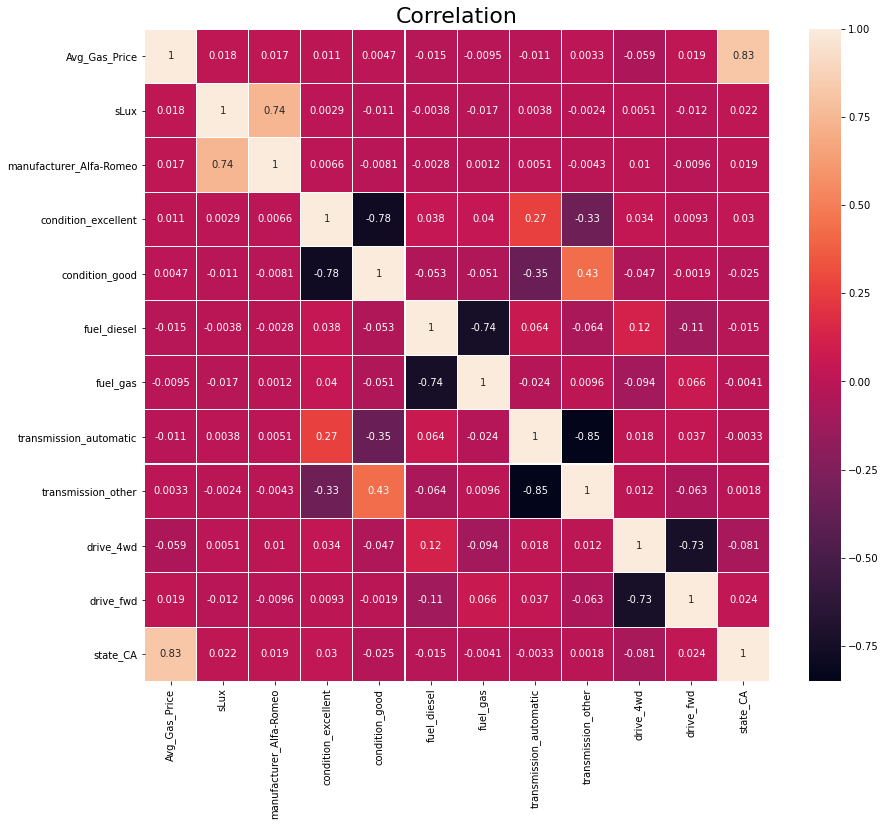

In [198]:
from IPython import display 
display.Image("correlation.png")

## 9. Choosing the Correct Algorithm
[Building the Algrorithm Notebook](./auto_clean_p7_BuildingTheAlogrithm).


Based on our cleaned dataset and pared down variables, we tested 9 different regression models: 
* Linear Regression
* Linear Log Regression
* Ridge Regression
* Elasticnet Regression
* Random Forest
* Extra Tree Regression
* Gamma Regression
* Linear with PCA
* elasticnet with PCA

We test each model on two metrics:
* Median Absolute Error: MAE
* Mean Percentage Error: MPE

Our dealer is using our prediction to decide if the asking price is lower than the predicted price he could get on Craig's list. The dealer is risk averse he does not want to take the deal if there is a high chance that the predicted price he is using is larger than the actual price. Therefore between two equally accurate models he would prefer if the  predictions under valued the car then over valued the car.

The Median Absolute Error (MAE) is useful for getting an overall fit of the model. It is a quick and easy way to compare how well one model does versus the other. Further it is not effected by the number of parameters as say R squared. This will give us the close prediction that we want. The closer the MAE is to zero, the better the model. 

The Median Percentage Error (MPE) tells us if our regression over estimates (positve MPE) or under estimates (negative MPE).  Between two similar models in accordance to our dealer's risk aversion we prefer a negative MPE that's close to zero. 

For More Information:

https://www.dataquest.io/blog/understanding-regression-error-metrics/


### Comparing Models

As we look at the 9 models we find a two overall trends after performing gridsearch hyperparameter tuning:
* All of these models over estimate versus under estimate (MPE is negative).
* Models error is correlated to outcome variable (price).

In [199]:
import os
import pandas as pd
basepath = os.getcwd()
sub_file = 'data'
file = 'model_comparison.csv'
file_name_path = os.path.join(basepath, sub_file, file)

score_tab= pd.read_csv(file_name_path)
def highlight_max(s):
    '''highlight the maximum in a Series light blue.'''
    is_max = s == s.max()
    return ['background-color: lightblue' if v else '' for v in is_max]
def highlight_min(s):
    '''highlight the minimum in a Series lightgreen.'''
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]



score_tab.sort_values('MAE Test').style.format({'MAE Train':'{:,.0f}', 'MAE Test':'{:,.0f}', 'MAE Test std':'{:,.0f}','MPE Train':'{:,.4f}', 'MPE Test':'{:,.4f}'
                                                ,'MPE Test std':'{:,.4f}'}).hide_index().apply(highlight_max, subset=pd.IndexSlice[:, ['MPE Test']]).apply(highlight_min, subset=pd.IndexSlice[:, ['MAE Test']])


#score_tab.sort_values('MAE Test')


Algorithm,MAE Train,MAE Test,MAE Test std,MPE Train,MPE Test,MPE Test std
Random Forest,"1,380","1,641",32,-0.0011,-0.0009,0.0016
Extra Tree,"1,540","1,889",21,0.0000,0.0003,0.0013
Gamma,"2,203","2,215",38,-0.0114,-0.0124,0.0059
ElasticNet,"2,235","2,289",27,-0.0059,-0.0030,0.0036
Ridge,"2,244","2,294",27,-0.0045,-0.0018,0.0041
Linear,"2,247","2,299",26,-0.0039,-0.0010,0.0043
PCA Linear,"2,752","2,754",15,-0.0154,-0.0144,0.0050
PCA Elastic,"2,748","2,790",26,-0.0386,-0.0359,0.0051


Within these nine models we can group them into PCA, Linear Regressions (with regularization) and Tree Methods:
* Models with the PCA have hive higher MAE and the absolute value of their MPE is larger than the other models so we eliminate
* 3 Linear Algortihm (Elastic Net, Linear Regression and Ridge Regression) have very similar MAE results around \\$2323
* Of the linear type of regressions Gamma had the best results. That makes sense as the explanatory variable (price) does not have a normal distribution but skews left.
* Tree methods (Random Forest and Extra Tree) in general had the best MAE scores

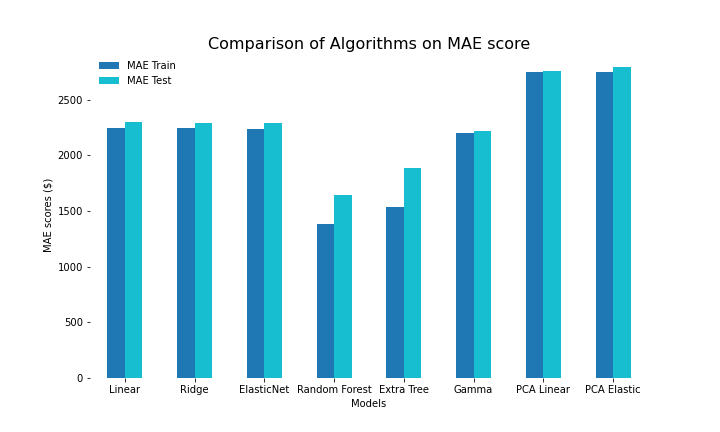

In [200]:
from IPython import display 
display.Image("Figx_ModelComparison.png")



Ensemble methods (Random Forest and Extra Tree) also have the best MPE scores.



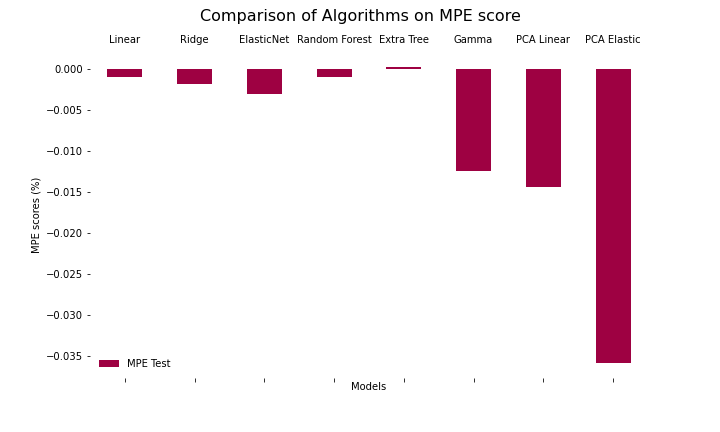

In [201]:
from IPython import display 
display.Image("Figx_ModelComparison_MPE.png")

### Winner Random Forest Algorithm.
Within Ensemble Methods:
* Random Forest Regression  MAE Test results are better than Extra Tree train scores
* Random Forest Regression  MPE Test results are within Exra Tree MPE test results + strandard deviation
* We therefore pick Randon Forest Regression.


## 10.  Further Optimizing Random Forest Regression
Continuation of [Building the Algrorithm Notebook](./auto_clean_p7_BuildingTheAlogrithm).

Now that we know that Random Forest looks like the best model for predicting used vehicle price, we use a further modulated grid search to find the best parameters. 

### Best Hyper paramters:
We look in particular at the minimum samples per leaf, maximum number of feat and minimum number of splits. Using grid search we find the optimum hyper parameters are:
The number of eatures are less than or equal to 125.
The minimum number of samples required to split an internal node as 3. 
The minimum number of samples required to be at a leaf node is also 3.

### Calculate new error
We then calculate MAE, MPE and graphing the error with a model using these optimized hyper paramters

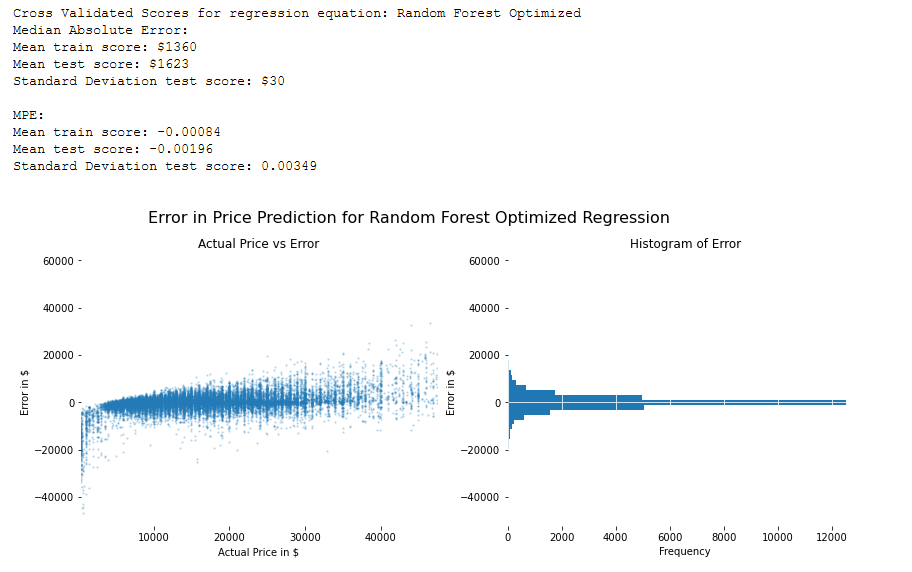

In [202]:
from IPython import display 
display.Image("figures/OptimizedRandomForest.png")


## 11.  Random Forest Regression Feature Importance

Continuation of [Building the Algrorithm Notebook](./auto_clean_p7_BuildingTheAlogrithm).

We tested the model to see what were the most important variables. This was determined by the impurity of the nodes using this variable in the random forest regression (aka how many vehicles were able to be divided by this charachtaristic). 

Below we have a graph on the left of what was the 20 most important varuables according to our train set.  On the right we do a five cross fold study of the feature importance using the test set and graph a boxplots of the values. 

The top 5 of variables that effect the problem were:
* Caculated variable "smake"
* Odometer aka mileage
* Age 
* Whether the vehicle was a pick up or not
* Whether the vehicle had 4 cylinders

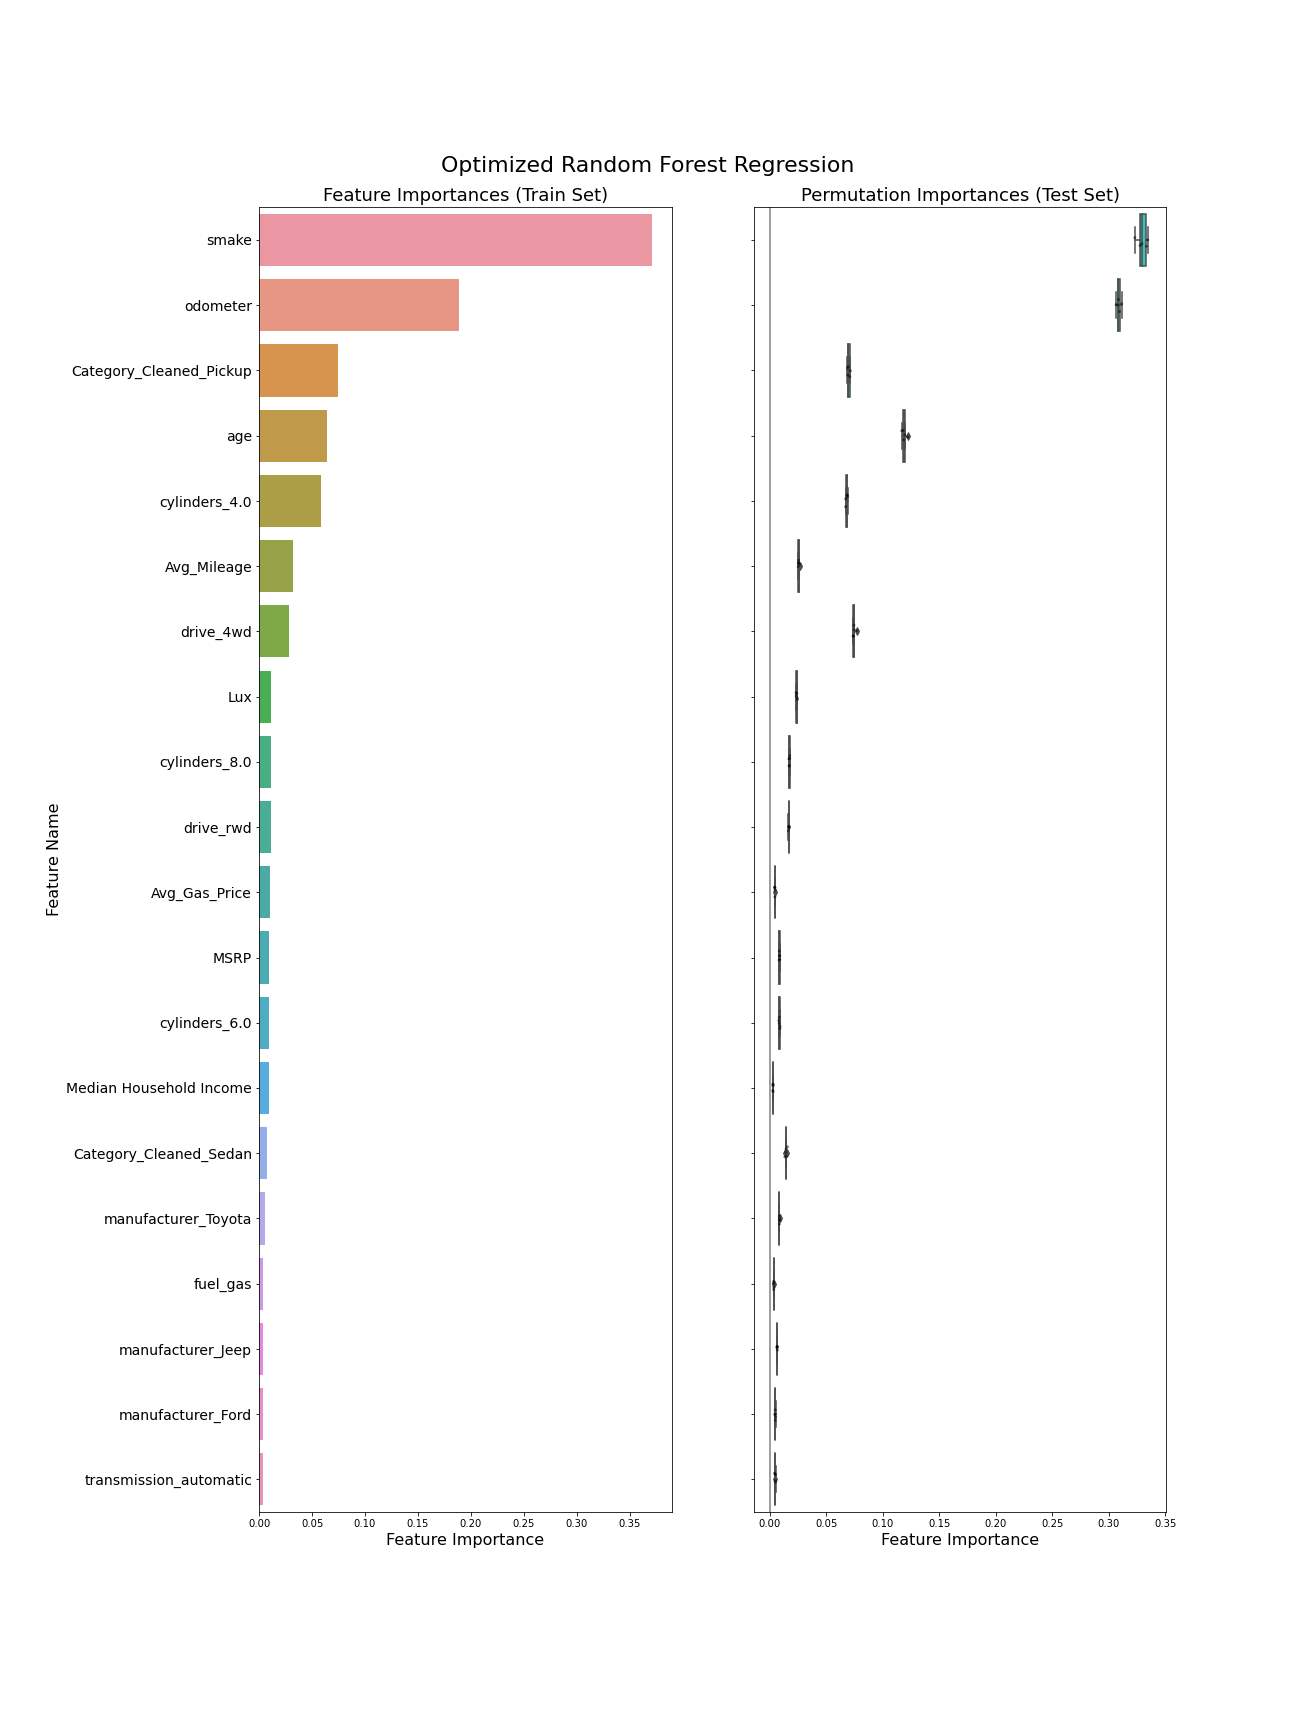

In [203]:
from IPython import display 
display.Image("Feature Importance.png")

## 12.  Validation the Model

Continuation of [Building the Algrorithm Notebook](./auto_clean_p7_BuildingTheAlogrithm).

### Is Our Model Good ?

Our goal was to determine whether the model's predicted price is within \\$2000 or less of the asking price online. For our model to be considered "good", we want the total predicted prices to have an accuracy above 80\%. The error in our model is $2000 or less 84.9\% of the time.

In [204]:
import os
import pandas as pd
basepath = os.getcwd()
file = 'error_validation.csv'
file_name_path = os.path.join(basepath, 'data', file)
error_tab= pd.read_csv(file_name_path).set_index('Summary Statistics')
def style_specific_cell(x):
    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[7, 2] = color
    return df1


error_tab.drop(columns=['Actual Price Train']).style.format("{:,.0f}").apply(style_specific_cell, axis=None)

,Train Error,Test Error,Validation Error
Summary Statistics,,,
count,"62,624","28,703","23,484"
mean,-1,23,9
std,"2,973","4,087","3,959"
min,"-71,454","-67,773","-62,571"
20%,"-1,193","-1,660","-1,512"
50%,-1,5,-7
80%,"1,139","1,595","1,465"
84.9%,"1,540","2,147","1,994"
max,"40,335","50,385","50,512"


The error distribution in general is fairly symmetrical. The above table shows that the mean and median of the error is within $20 dollars of each other. Given that the error range is in the tens of the thousands of dollars, that implies they are relatively close. This is futher illustrated in the histogram of the error graph for Validation Error listed below shown below. 

We also note that error for each price point within the range of \\$500 to \\$35000 has a roughly symmetrical distribution of the error where the standard deviation ranges from from \\$100 to \\$5000.  This is illustrated in the scattergraph of the Actual price vs the Error in price disgram shown below.


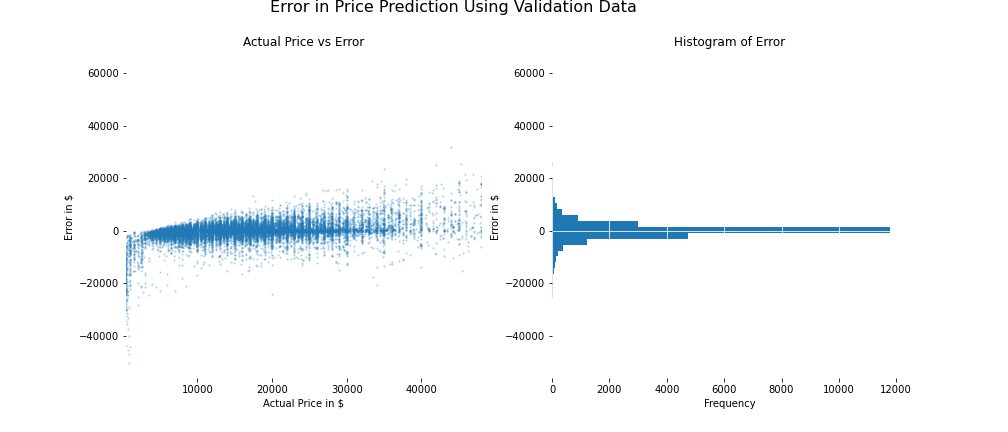

In [205]:
from IPython import display 
display.Image("figures/Validation.png")

### Overfit and Bias

Given this is a random forest model we want to make sure the model is not overfit or their is a change in the bias between out of sample values. To check this we see if 
    * The difference in the mean error for Validation Error and Trainin Error should be within 0.1% of the average price
    * The difference in the median error for Validation Error and Trainin Error should be within 0.1% of the average price
    * These both Turn out to be true

In [206]:
def style_specific_cell(x):
    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[[1,5], 3] = color
    return df1
pd.options.display.float_format = '{:.3f}'.format
error_tab['Error Difference over Price']=(error_tab['Validation Error']-error_tab['Train Error'])/error_tab['Actual Price Train'].mean()
error_tab[['Actual Price Train','Train Error','Validation Error', 'Error Difference over Price']].style.format("{:,.0f}").format({'Error Difference over Price': '{:.2%}'}).apply(style_specific_cell, axis=None)

,Actual Price Train,Train Error,Validation Error,Error Difference over Price
Summary Statistics,,,,
count,"62,624","62,624","23,484",-137.04%
mean,"16,544",-1,9,0.03%
std,"9,717","2,973","3,959",3.45%
min,102,"-71,454","-62,571",31.10%
20%,"8,173","-1,193","-1,512",-1.11%
50%,"14,990",-1,-7,-0.02%
80%,"23,900","1,139","1,465",1.14%
84.9%,"25,995","1,540","1,994",1.59%
max,"95,000","40,335","50,512",35.63%


### Visualizing Overfit and Bias

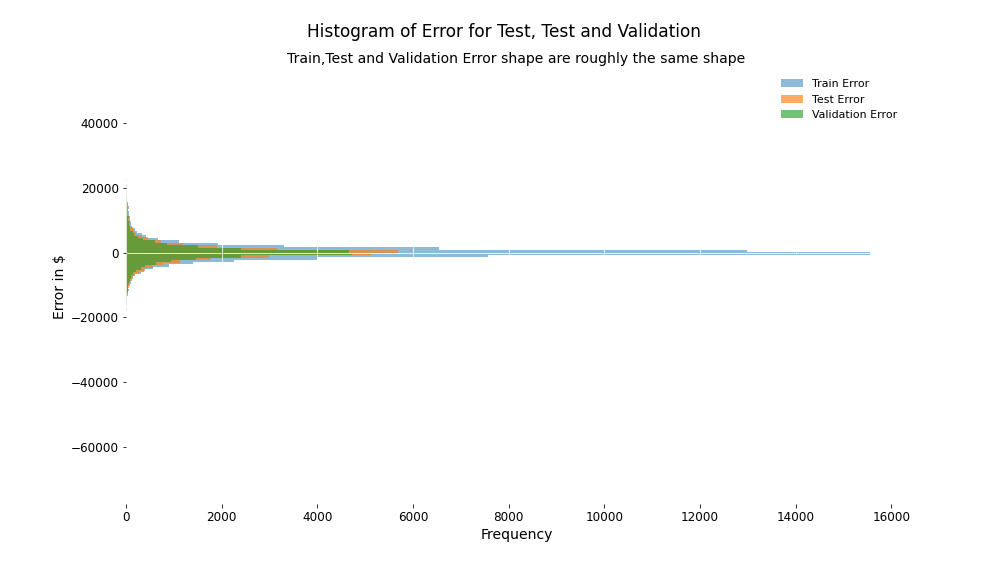

In [207]:
from IPython import display 
display.Image("Error Distribution For Train, Test and Validation.png")

## 13 Prediction 
Continuation of [Building the Algrorithm Notebook](./auto_clean_p7_BuildingTheAlogrithm).

Returning to our motivating question, Dapper Dan was offered 25 vehicle by their wholesaler. The info for these vehihcle came scraped data from Craigslist Februrary 15, 2021. Utilizing our algorithm we determed that that BC should buy 9 of the 25 vehicles offered.

In [208]:
import numpy as np
file = 'data\Ravi_Prediction.csv'
file_name_path = os.path.join(basepath,  file)

dx= pd.read_csv(file_name_path)
dx['difference']= dx['prediction']-dx['listed_price']
dx['Buy']= np.where((dx['difference']>2000), 'Buy', '')
buy_count= np.where((dx['difference']>2000), 1, 0)

pd.options.display.float_format = '{:,}'.format
def color_negative_red(val): 
    """ 
    Takes a scalar and returns a string with 
    the css property `'color: red'` for negative 
    strings, black otherwise. 
    """
    color = 'blue' if val >2000 else 'black'
    return 'color: % s' % color 
  
dx.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['difference']]).hide_index()\
.format({'difference':'{:,.0f}','prediction':'{:,.0f}', 'listed_price':'{:,.0f}' })

name,listed_price,prediction,difference,Buy
2011 Kia Optima,"4,950","6,811","1,861",
2013 Volkswaggen Jetta,"6,900","10,809","3,909",Buy
2011 Elantra Limited for sale,"5,250","7,568","2,318",Buy
2010 Honda,"5,500","9,368","3,868",Buy
2012 Mercedes Benz C300 4MATIC Sport,"9,940","11,690","1,750",
2013 Honda civic lx,"6,950","10,241","3,291",Buy
2013 Lincoln MKZ,"11,000","11,028",28,
2012 Chevrolet Cruze,"5,799","13,125","7,326",Buy
2013 BMW X5 XDRIVE,"13,300","14,621","1,321",
2011 BMW X3 XDRIVE 3.0,"10,300","12,219","1,919",


## 14. Conclusion

### Restrictions and assumptions in the model
Through this process, we can see there are some restrictions in how the model is deployed: 
* This dataset only has what the craiglist price was not what the vehicle actually sold at. There could be aconsiderable difference for this.
* This dataset also does not include if the vehicle was in an accident, or how long the vehicles had been listed.
* This model is not as good for vehicles over 35000 dollars. It biases downwards.
* Similarly because these vehicles do not include salvage, for parts vehicles its not good with vehicles who are price less than 500 dollars. Admittidly BC would not want those any way.
    

### Next Steps
* It would be exteremly useful to have data for what the vehicles are actually sold at.
    * Just because this is the listed price it does not mean its is what the vehicle is sold as. 
* Search within text description for words that correlate with the need for Craiglist seller need to sell soon.
    * Craig's list sellers are sometimes by time. That would influence price further down.(Example Fire sales)
* Search within text description for words that correlate with the need for Craiglist seller need to sell soon.
    * Craig's list sellers are sometimes by time. That would influence price further down.(Example Fire sales).
* Redo this study with More MSRP data available
    * The more MSRP data the more of an idea we have of the starting point for pricing the vehicle. At the very least it can tell us whether the vehicle started out as an expensive vehicle. 
* Search for other possible variables that correlates with auto price
    * The bias seen in the non ridge regression models shows there is another variable we should be looking for.


        
### Credits